# DETR : How to load a dataset

This tutorial aims to introduce you to the dataset you can use to train or finetune a model on DETR.

    - 1. Dataset pipeline and outputs
    - 2. Coco Dataset
    - 3. Voc Dataset
    - 4. Tensorflow csv Dataset

<img src="../images/datasetsupport.png"></img>



Set the download link in the cell bellow

## 1. Dataset pipeline and outputs

Any implemented dataset on this repository implement the following pipeline

- **Dataset specific**: The first one is specific to a dataset. THis repository provide method to load dataset that follow the coco, voc or Tensorflow csv format. If you want to support an other format you can considere to implement your own following our tutorial (DETR Tensorflow - How to setup a custom dataset.ipynb) or post a feature request on the github. 

- **DETR transformations/augmentations**: detr_tf apply the transformations and augmentations needed on your data
- **Image normalization**: The pipeline will normalizations your image before to call return the data
- **Tensorflow Dataset**: Once the dataset is ready, the method setup a Tensorflow Dataset and return an iterator that can be used to train or finetune DETR.

<img src="../images/tutorials/data-pipeline.png"></img>


The datasets outputs:
    
- **images** of shape (batch_size, height, width, 3) where height and width are constant defined in your training config.
- **target bbox** (batch_size, 100, 4). All target bbox are padded to fixed size and comes up with an header to keep track of the number of real bbox. This is usefull later on during the training on Tensorflow. Note that this header is temporary and should be remove in upcoming versions.
- **target class** (batch, size, 100, 1) The class id of each bbox. Like the bbox, the target class are padded for training purposes.


## Coco Dataset

If you're dataset follow the Coco Dataset format, then detr_tf provide you with a method to automaticly load your dataset.

### To load the dataset, you must first setup a training config


In [6]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_coco_dataset
from detr_tf.training_config import TrainingConfig

class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()
        self.datadir = "/path/to/your/data"
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_coco_dataset("val", config.batch_size, config, augmentation=True)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


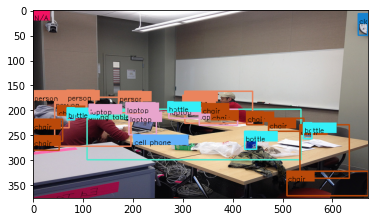

In [15]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break

## Voc Dataset

If you're dataset follow the Voc Dataset format, then detr_tf provide you with a method to automaticly load your dataset.

### To load the dataset, you must first setup a training config and set the class in your dataset (without background)

In [18]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_voc_dataset
from detr_tf.training_config import TrainingConfig

# In this example, we're load voc, but if you're dataset follow the voc format and contains different class, you're clas
# should be different
VOC_CLASS_NAME = [
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
    'sheep', 'sofa', 'train', 'tvmonitor'
]


class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()
        self.datadir = "/path/to/your/data"
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_voc_dataset("val", VOC_CLASS_NAME, config.batch_size, config, augmentation=True)

The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


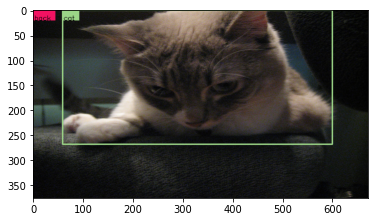

In [19]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break

## Tensorflow csv Dataset

If you're dataset follow the Tensorflow csv format, then detr_tf provide you with a method to automaticly load your dataset.


### To load the dataset, you must first setup a training config

In [21]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_tfcsv_dataset
from detr_tf.training_config import TrainingConfig

class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()
        self.datadir = "/path/to/your/data"
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_tfcsv_dataset("test", config.batch_size, config, augmentation=True)

The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


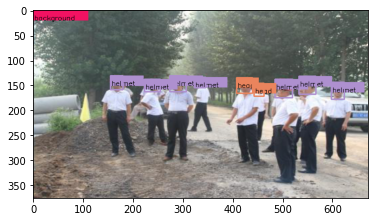

In [24]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break